In [1]:
import geopandas as gpd
import pandas as pd

In [2]:
buildings = gpd.read_file(
    r"C:\Users\tinni\Desktop\dhaka_rooftop_gardening\data\dhaka_buildings_final.gpkg"
)

buildings.head()

C:\Users\tinni\anaconda3\Lib\site-packages\pyogrio\core.py:35: RuntimeWarning: Could not detect GDAL data files.  Set GDAL_DATA environment variable to the correct path.
  _init_gdal_data()


,osm_id,code,fclass,name,type,area_m2,garden_area_m2,geometry
0,23781261,1500,building,Dr Wahab,None,194.490542,58.347162,"MULTIPOLYGON (((90.42028 23.80739, 90.42039 23..."
1,23852696,1500,building,"ক্যাম্পাস ২, এআইইউবি (আমেরিকান ইন্টার",None,779.925970,233.977791,"MULTIPOLYGON (((90.40222 23.79462, 90.40226 23..."
2,24024423,1500,building,None,school,8062.193270,2418.657981,"MULTIPOLYGON (((90.43072 23.81164, 90.43132 23..."
3,24024444,1500,building,None,None,1867.358566,560.207570,"MULTIPOLYGON (((90.41888 23.7984, 90.41969 23...."
4,24024463,1500,building,American International School Dhaka,None,1540.447945,462.134383,"MULTIPOLYGON (((90.41945 23.80066, 90.41949 23..."


In [3]:
buildings.columns

Index(['osm_id', 'code', 'fclass', 'name', 'type', 'area_m2', 'garden_area_m2',
       'geometry'],
      dtype='object')

In [4]:
total_garden_area = buildings["garden_area_m2"].sum()

total_garden_area

np.float64(31420375.022204764)

In [5]:
total_garden_area_km2 = total_garden_area / 1_000_000
total_garden_area_km2

np.float64(31.420375022204762)

In [6]:
def suitability(area):
    if area < 50:
        return "Low"
    elif area < 150:
        return "Medium"
    else:
        return "High"

buildings["suitability"] = buildings["garden_area_m2"].apply(suitability)

In [7]:
buildings["suitability"].value_counts()

suitability
Low       821085
Medium    127834
High       16727
Name: count, dtype: int64

In [8]:
# Adoption scenarios
scenarios = {
    "10% adoption": 0.10,
    "25% adoption": 0.25,
    "50% adoption": 0.50
}

scenario_results = {}

for label, rate in scenarios.items():
    scenario_results[label] = total_garden_area_km2 * rate

scenario_results

{'10% adoption': np.float64(3.1420375022204765),
 '25% adoption': np.float64(7.855093755551191),
 '50% adoption': np.float64(15.710187511102381)}

In [9]:
veg_yield_kg_per_m2 = 20

annual_food_kg = total_garden_area * veg_yield_kg_per_m2
annual_food_tons = annual_food_kg / 1000

annual_food_tons


np.float64(628407.5004440952)

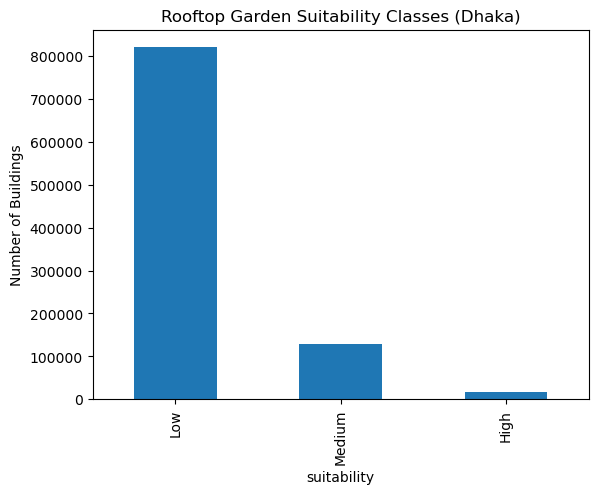

In [11]:
import matplotlib.pyplot as plt

buildings["suitability"].value_counts().plot(
    kind="bar",
    title="Rooftop Garden Suitability Classes (Dhaka)"
)

plt.ylabel("Number of Buildings")
plt.show()


In [13]:
buildings.to_file(
    r"C:\Users\tinni\Desktop\dhaka_rooftop_gardening\data\dhaka_buildings_suitability.gpkg",
    driver="GPKG"
)